Here we're going to use the MNIST database. This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face.

Let's load the dataset first.

**Tasks. Part 0.**

1. First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer!

Spoiler alert: Davide's efficiency was ~80%, much worse than ML!

2. Here is how you plot the images and the corresponding labels (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.

Ok so the data is simply each pixel value within an 8 x 8 grid. For this analysis, we don't care about the 2-D nature of the image, we can just treat it as an 8 x 8 = 64 dimensional array. So our data have 1797 samples in 64 dimensions.

Then each of the 1797 images has a label.

Here are a few of the images in the dataset
![Test.png](Test.png)

My guess:

[8 9 8 1 2 6 9  
 1 9 4 0 6 1 7  
 6 9 5 4 4 8 4  
 0 5 6 1 7 9 3  
 2 1 0 8 3 9 6  
 1 1 2 0 5 4 4  
 9 6 2 6 1 0 0]

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [61]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

print(digits.DESCR)

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into 

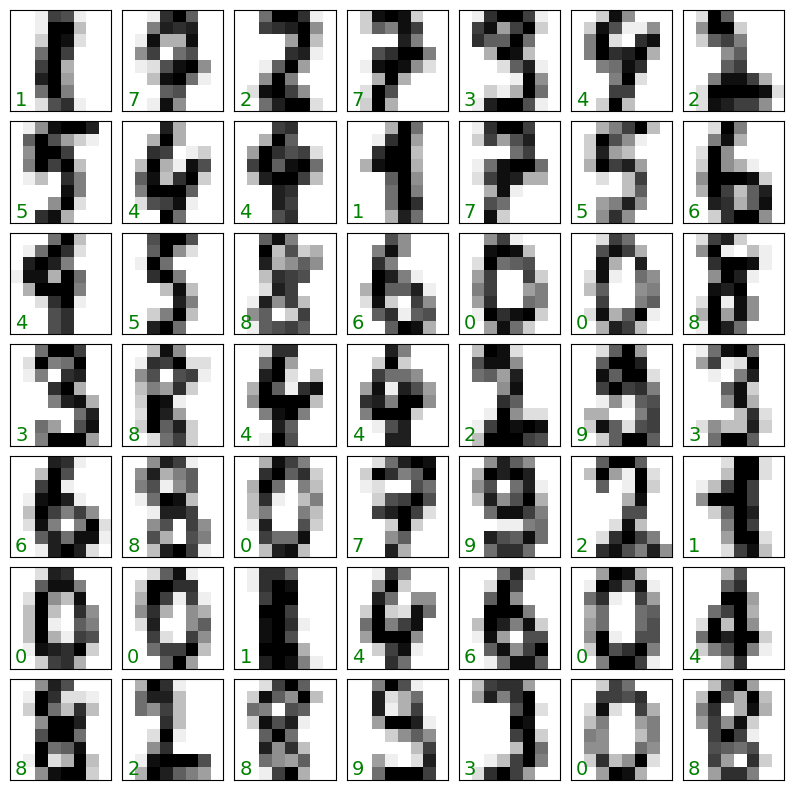

In [62]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [63]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


**Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits**

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N = 64$ dimensions! So we need to reduce the dimensionality of the space

3. Use the unsupervised dimensionality reduction technique called Isomap. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N < M$) manyfold. Reduce the MINST dataset. Do some plots to visualize your results

Note. Isomap is very recent. It was introduced by Tenenbaum et al (2000) ---a paper that has something like $1.5$ x $10^4$ citations.

(100, 2)


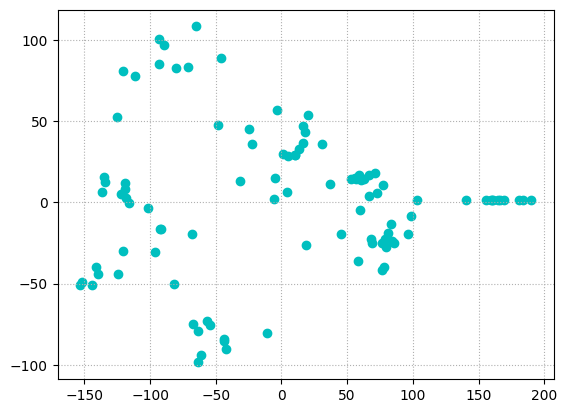

In [64]:
embedding = Isomap(n_components=2)
digits_transformed = embedding.fit_transform(digits.data[:100])
print(digits_transformed.shape)

plt.scatter(digits_transformed[:, 0], digits_transformed[:, 1], color='c')
plt.grid(linestyle=':')
plt.show()

(500, 2)


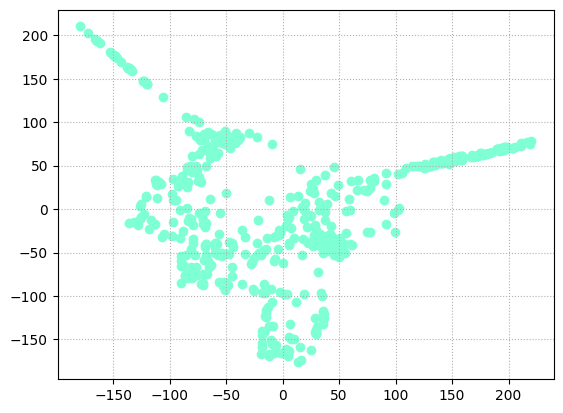

In [65]:
embedding = Isomap(n_components=2)
digits_transformed_500 = embedding.fit_transform(digits.data[:500])
print(digits_transformed_500.shape)

plt.scatter(digits_transformed_500[:, 0], digits_transformed_500[:, 1], color='aquamarine')
plt.grid(linestyle=':')
plt.show()

(100, 3)


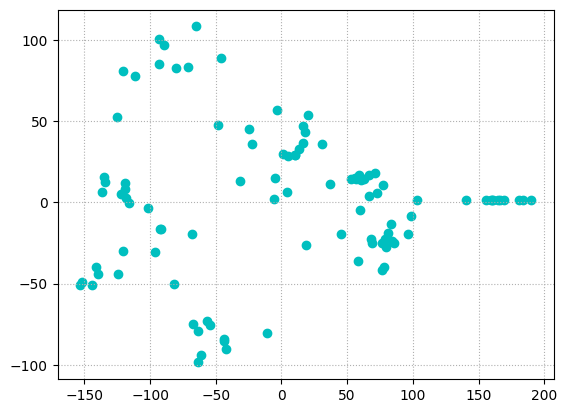

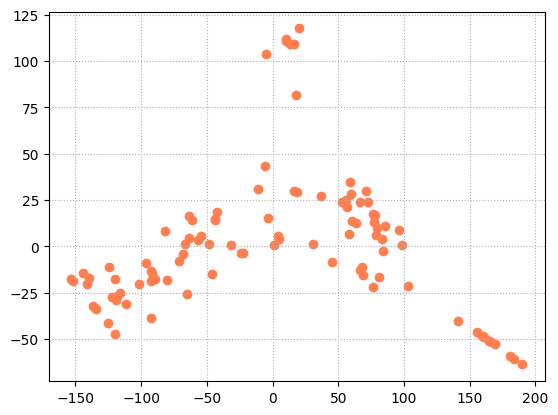

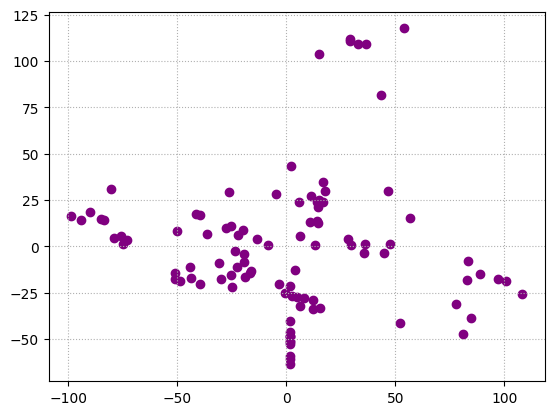

In [66]:
embedding_3 = Isomap(n_components=3)
digits_transformed_3 = embedding_3.fit_transform(digits.data[:100])
print(digits_transformed_3.shape)

plt.scatter(digits_transformed_3[:, 0], digits_transformed_3[:, 1], color='c')
plt.grid(linestyle=':')
plt.show()

plt.scatter(digits_transformed_3[:, 0], digits_transformed_3[:, 2], color='coral')
plt.grid(linestyle=':')
plt.show()

plt.scatter(digits_transformed_3[:, 1], digits_transformed_3[:, 2], color='purple')
plt.grid(linestyle=':')
plt.show()

**Tasks. Part 2. Supervised Learning: Classification on Digits**

Now we want to classify the dataset.

4. Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need sklearn.model_selection.train_test_split.

5. Use a simple Logistic Regression which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag solver='sag' (I found the default solver had a bug, at least when I tried).

6. Compute the accuracy (sklearn.metrics.accuracy_score) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7. The accuracy is a single number doesn't tell us where we've gone wrong. Plot the confusion matrix as we did above. What are the digits that are more challenging to identify, does it make sense?

There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc. We'll get to those in the coming weeks.

In [78]:
X = digits.data
y = digits.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.8)
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(Xtrain, ytrain)

print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

ypred = clf.predict(Xtrain)
print(confusion_matrix(ytrain, ypred))

ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

(359, 64) (359,)
(1438, 64) (1438,)
[[48  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0  0  0 30]]
[[130   0   0   0   0   0   0   0   0   0]
 [  0 146   1   0   3   0   0   0   1   0]
 [  0   0 139   2   0   0   0   1   0   0]
 [  0   0   0 136   0   0   0   0   4   3]
 [  0   1   0   0 146   0   0   0   0   0]
 [  0   0   0   0   1 143   0   0   0   3]
 [  0   1   0   0   0   0 142   0   1   0]
 [  0   0   0   0   0   0   0 149   0   0]
 [  0   7   2   2   0   0   2   0 122   0]
 [  0   1   0   4   1   4   0   1   0 139]]
